# Exploratory Analysis of Restaurants of Pondicherry listed in Zomato

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Puducherry. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

## Why Zomato API
Zomato APIs give us access to the freshest and most exhaustive information for over 1.5 million restaurants across 10,000 cities globally. With the Zomato APIs, we can:

- Search for restaurants by name, cuisine, or location
- Display detailed information including ratings, location and cuisine
- Use the Zomato Foodie Index to show great areas to dine in a city

I have taken <b>437 restaurants</b> as my sample to perform this data analysis.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium

In [2]:
#Importing data
data = pd.read_csv("restaurants.csv")

## Which are the top restaurant chains in Pondicherry? 

Text(0.5, 0, 'Number of outlets')

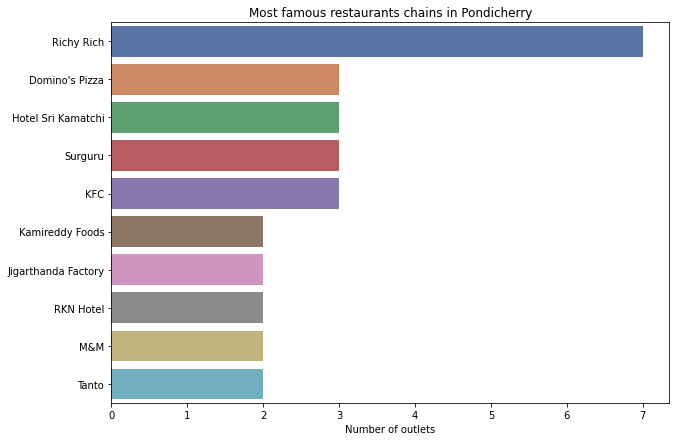

In [3]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Pondicherry")
plt.xlabel("Number of outlets")

As you can see "Richy Rich" has the most number of outlets in and around Pondicherry followed by Domino's Pizza, Surguru, Hotel Sri Kamatchi and KFC

## How many of the restuarants accept online orders? 

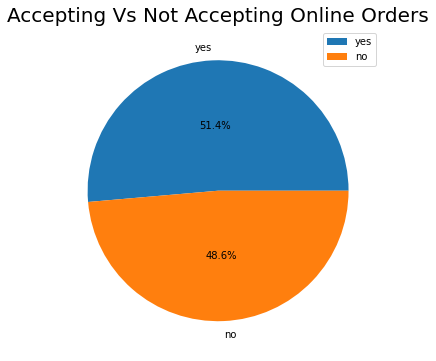

In [4]:
x = data['has_online_delivery'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=x, autopct="%.1f%%", labels=['yes','no'], pctdistance=0.5)
plt.title("Accepting Vs Not Accepting Online Orders", fontsize=20)
ax.legend();

The above figure shows the split between restaurants in accepting and not accepting online orders is mostly equal. There are two hypothesis that can be derived from the above illustration:
1. Most restauratns are 10 to 15 minutes away by a two-wheeler due to the small geographical area.
2. This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online. Zomato may want to consider giving them some more benefits if they want to increse the number of restaurants serving their customers online.

## Rating Distribution

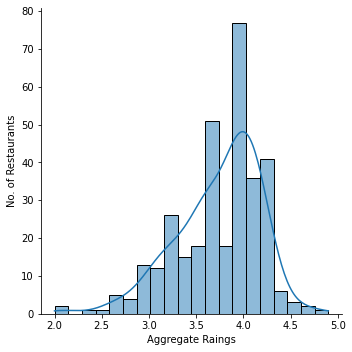

In [5]:
zeroRatingsIndex = data[data['aggregate_rating'] == 0.0 ].index
ratings = data.aggregate_rating.drop(zeroRatingsIndex)
ratings_plot = sns.displot(ratings,
            bins=20,
            kde=True);
ratings_plot.set_axis_labels("Aggregate Raings", "No. of Restaurants");

1. Almost more than 50 percent of restaurants has rating between 3 and 4.
2. Restaurants having rating more than 4.5 are very rare.

## Heatmap of restaurant location

In [6]:
restaurant_lat = np.array(data.latitude)
restaurant_lon = np.array(data.longitude)
heatMap = list(zip(restaurant_lat, restaurant_lon))
m = folium.Map([11.937335, 79.821099], zoom_start=14,width="%100",height="%100")
folium.plugins.HeatMap(heatMap).add_to(m)
m

It is clear that restaurants tend to concentrate in White Town area. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

## Which are the most popular cuisines of Pondicherry?

Top 10 most popular cusines among Pondicherry Restaurants:
- South Indian
- North Indian
- Chinese
- Beverages
- Fast Food
- Biryani
- Desserts
- Continental
- Pizza
- Italian


Text(0, 0.5, 'Cuisines')

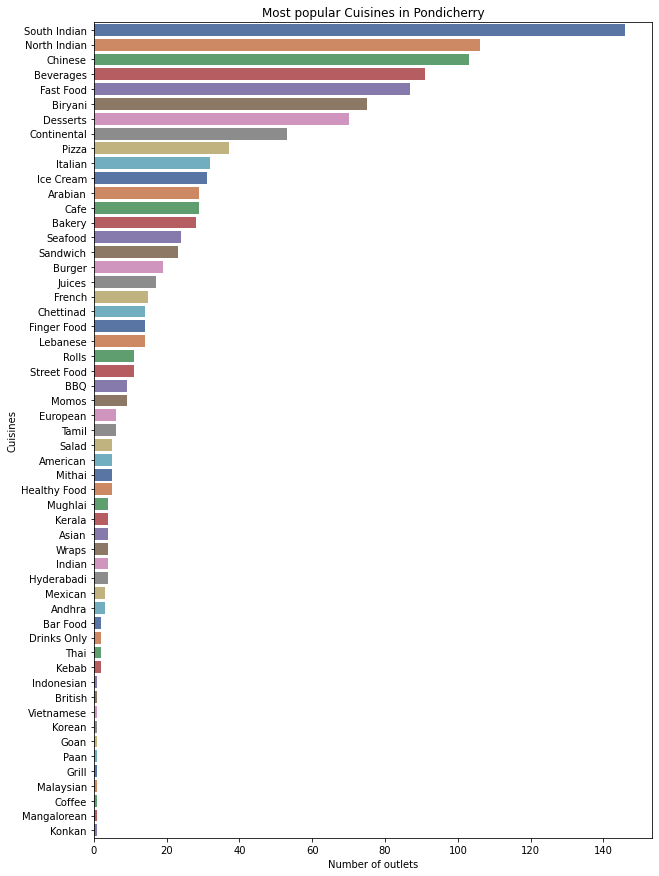

In [7]:
cuisines = []
for i in data['cuisines'].values:
    for _ in i.split(', '):
        cuisines.append(_)
cuisines = pd.Series(cuisines).value_counts()

print ("Top 10 most popular cusines among Pondicherry Restaurants:")
for _ in cuisines[:10].keys():
    print ('-',_)

plt.figure(figsize=(10,15))
sns.barplot(x=cuisines,y=cuisines.index,palette='deep')
plt.title("Most popular Cuisines in Pondicherry")
plt.xlabel("Number of outlets")
plt.ylabel("Cuisines")

It seems "South India" cuisine is most popular among our sample restaurants. Does this mean all restaurants serving South Indian are popular and highly-rated. Let us investigate further.

### Popular cuisines among top rated restaurants

Here we shall analyze the cuisines in restaurants that have gotten an aggregare rating above 4.

Top 10 most popular cusines among Restaurants with rating of above 4.0:
- Beverages
- Desserts
- North Indian
- Fast Food
- South Indian
- Continental
- Italian
- Pizza
- Chinese
- Cafe


Text(0, 0.5, 'Cuisines')

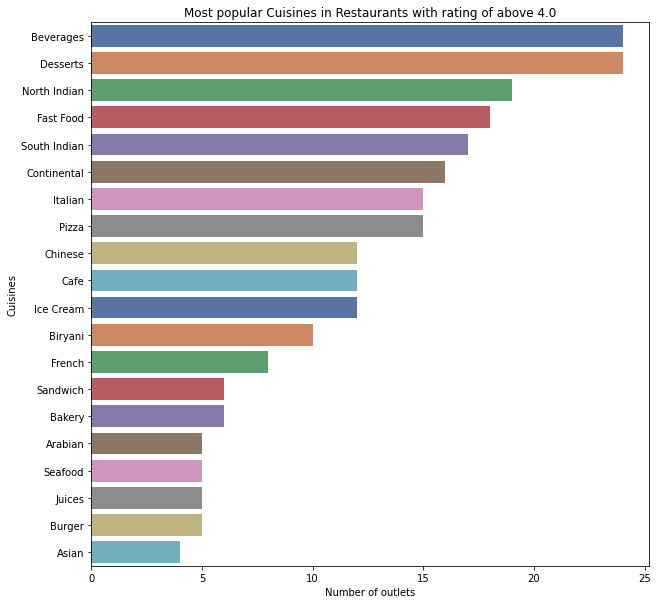

In [8]:
TopRated = data.loc[data['aggregate_rating'] > 4]
cuisines = []
for i in TopRated['cuisines'].values:
    for _ in i.split(', '):
         cuisines.append(_)
cuisines = pd.Series(cuisines).value_counts()[:20]

print ("Top 10 most popular cusines among Restaurants with rating of above 4.0:")
for _ in cuisines[:10].keys():
    print ('-',_)

plt.figure(figsize=(10,10))
sns.barplot(x=cuisines,y=cuisines.index,palette='deep')
plt.title("Most popular Cuisines in Restaurants with rating of above 4.0")
plt.xlabel("Number of outlets")
plt.ylabel("Cuisines")

Things change a little bit when we look into thee data even more deeper. It seems top rated restaurants actually serve desserts and beverages

## Top 10 Highest Rated Restaurants in Pondicherry

In [9]:
data.sort_values(['aggregate_rating'], ascending = False)[:10][['name', 'locality', 'cuisines']].style.hide_index()

name,locality,cuisines
Gelateria Montecatini Terme,White Town,Desserts
Zuka,MG Road,"Desserts, Bakery"
Bread & Chocolate,Auroville,"Bakery, Cafe, Healthy Food"
Baker Street,MG Road,"Bakery, French"
Coromandel Cafe,White Town,"Cafe, Italian, French, British"
Boston Cafe,White Town,"Fast Food, Chinese, North Indian"
Cream Affair,White Town,"American, Cafe, Desserts, Ice Cream"
Lassi Shop,Gandhinagar,"Beverages, Juices, Desserts, Fast Food"
KFC,"Providence Mall, MG Road","Burger, Fast Food, Finger Food, Beverages"
Auroville Bakery,Auroville,Bakery


It is clear that top rated restaurants are mostly inclined towards desserts, ice-cream, beverages and continental food and less towards Indian food.

## Restaurants popular among tourists
Tourists visiting Pondicherry tend to check information about restaurants in Zomatto and the first thing that appeals them are photos. So we shall analyze this data

In [10]:
cleaned_data = data.drop(data[data['photo_count'] == 0].index)
cleaned_data = cleaned_data.drop(cleaned_data[cleaned_data['aggregate_rating'] == 0].index)

In [38]:
len(cleaned_data.aggregate_rating.values)

293

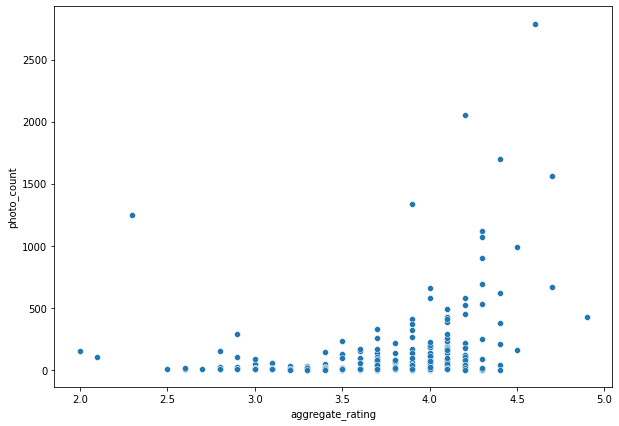

In [54]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = cleaned_data,
                x = "aggregate_rating",
                y = "photo_count");

We can observe there the region between 3.75 to 4.5 in the x-axis representing the average aggregate rating is more dense. We can conclude there is a relationship between the number of photos taken to the aggregate rating.

## The Most Popular Locality 

In [12]:
data.locality.value_counts()[:10]

Heritage Town               76
MG Road                     76
White Town                  70
Gandhinagar                 55
Villianur                   44
Lawspet                     42
Muthial Pet                 16
Mudaliarpet                 15
Auroville                   14
Providence Mall, MG Road    12
Name: locality, dtype: int64